In [1]:
# Common stuff to import
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(font_scale=1.5)
import pandas as pd

In [2]:
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [3]:
cwd = os.getcwd()
path2data = os.path.join(cwd,'data')

In [4]:
# Open the 3.0x rheobase file
#filename = os.path.join(cwd,'three_df.pkl')
#with open(filename, 'rb') as f:
#    df_30x = pickle.load(f)

In [5]:
# Open the 1.5x rheobase file
filename = os.path.join(cwd,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df_15x = pickle.load(f)

In [6]:
# A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
df = df_15x.fillna(0).applymap(f)
#df_30x = df_30x.fillna(0).applymap(f)

In [7]:
# Join the dataframes horizonstally, so that all features coming from df_15x get a '_1.5x' suffix
# and all the ones from df_30x get a '_3.0x' suffix
#df = df_15x.join(df_30x, lsuffix='_1.5x', rsuffix='_3.0x')

In [8]:
print("There are %d models+data and %d features" % df.shape)

There are 7285 models+data and 466 features


In [9]:
# Impute remaining missing values with 0.
df = df.fillna(0)

In [10]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)
df.groupby(df.index).first()
df = pd.DataFrame.drop_duplicates(df)


In [11]:
# Check to see what is there.  Might also check to see if there is data there.
#df_30x#.head()

# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
print(len(experiment_df))

699


In [12]:
#print(len(experiment_df))
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
#experiment_df.index
experiment_df.groupby(experiment_df.index).first()
len(experiment_df)

699

In [13]:
print(len(model_df))
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()
len(model_df)

968


968

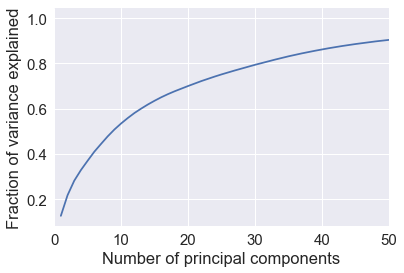

In [14]:
# Do PCA and look at variance explained
pca = PCA()
pca.fit(df.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [15]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)

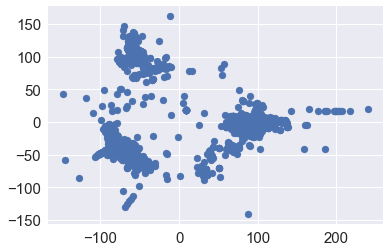

In [16]:
# Do an isomap embedding in 2 dimensions
isomap = Isomap(n_components=2)
isomap.fit(df.values)

# Plot that isomap embedding. Each is a model (or a cell, for data)
plt.scatter(*isomap.embedding_.T);
# I don't love the isomap fit

CPU times: user 12.2 s, sys: 104 ms, total: 12.3 s
Wall time: 12.1 s


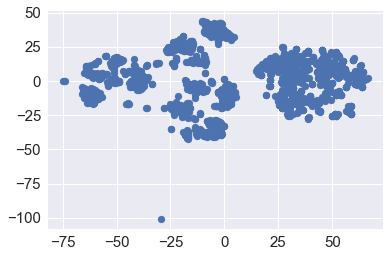

In [17]:
# Do a TSNE embedding in two dimensions
tsne = TSNE(n_components=2, perplexity=30)
%time tsne.fit(df.values)

# Plot that TSNE embedding. Each is a model (or a cell, for data)
plt.scatter(*tsne.embedding_.T);

CPU times: user 16.5 s, sys: 20 ms, total: 16.6 s
Wall time: 16.5 s
CPU times: user 11.8 s, sys: 180 ms, total: 12 s
Wall time: 11.7 s
CPU times: user 18.1 s, sys: 192 ms, total: 18.2 s
Wall time: 18 s
CPU times: user 19.6 s, sys: 192 ms, total: 19.8 s
Wall time: 19.6 s


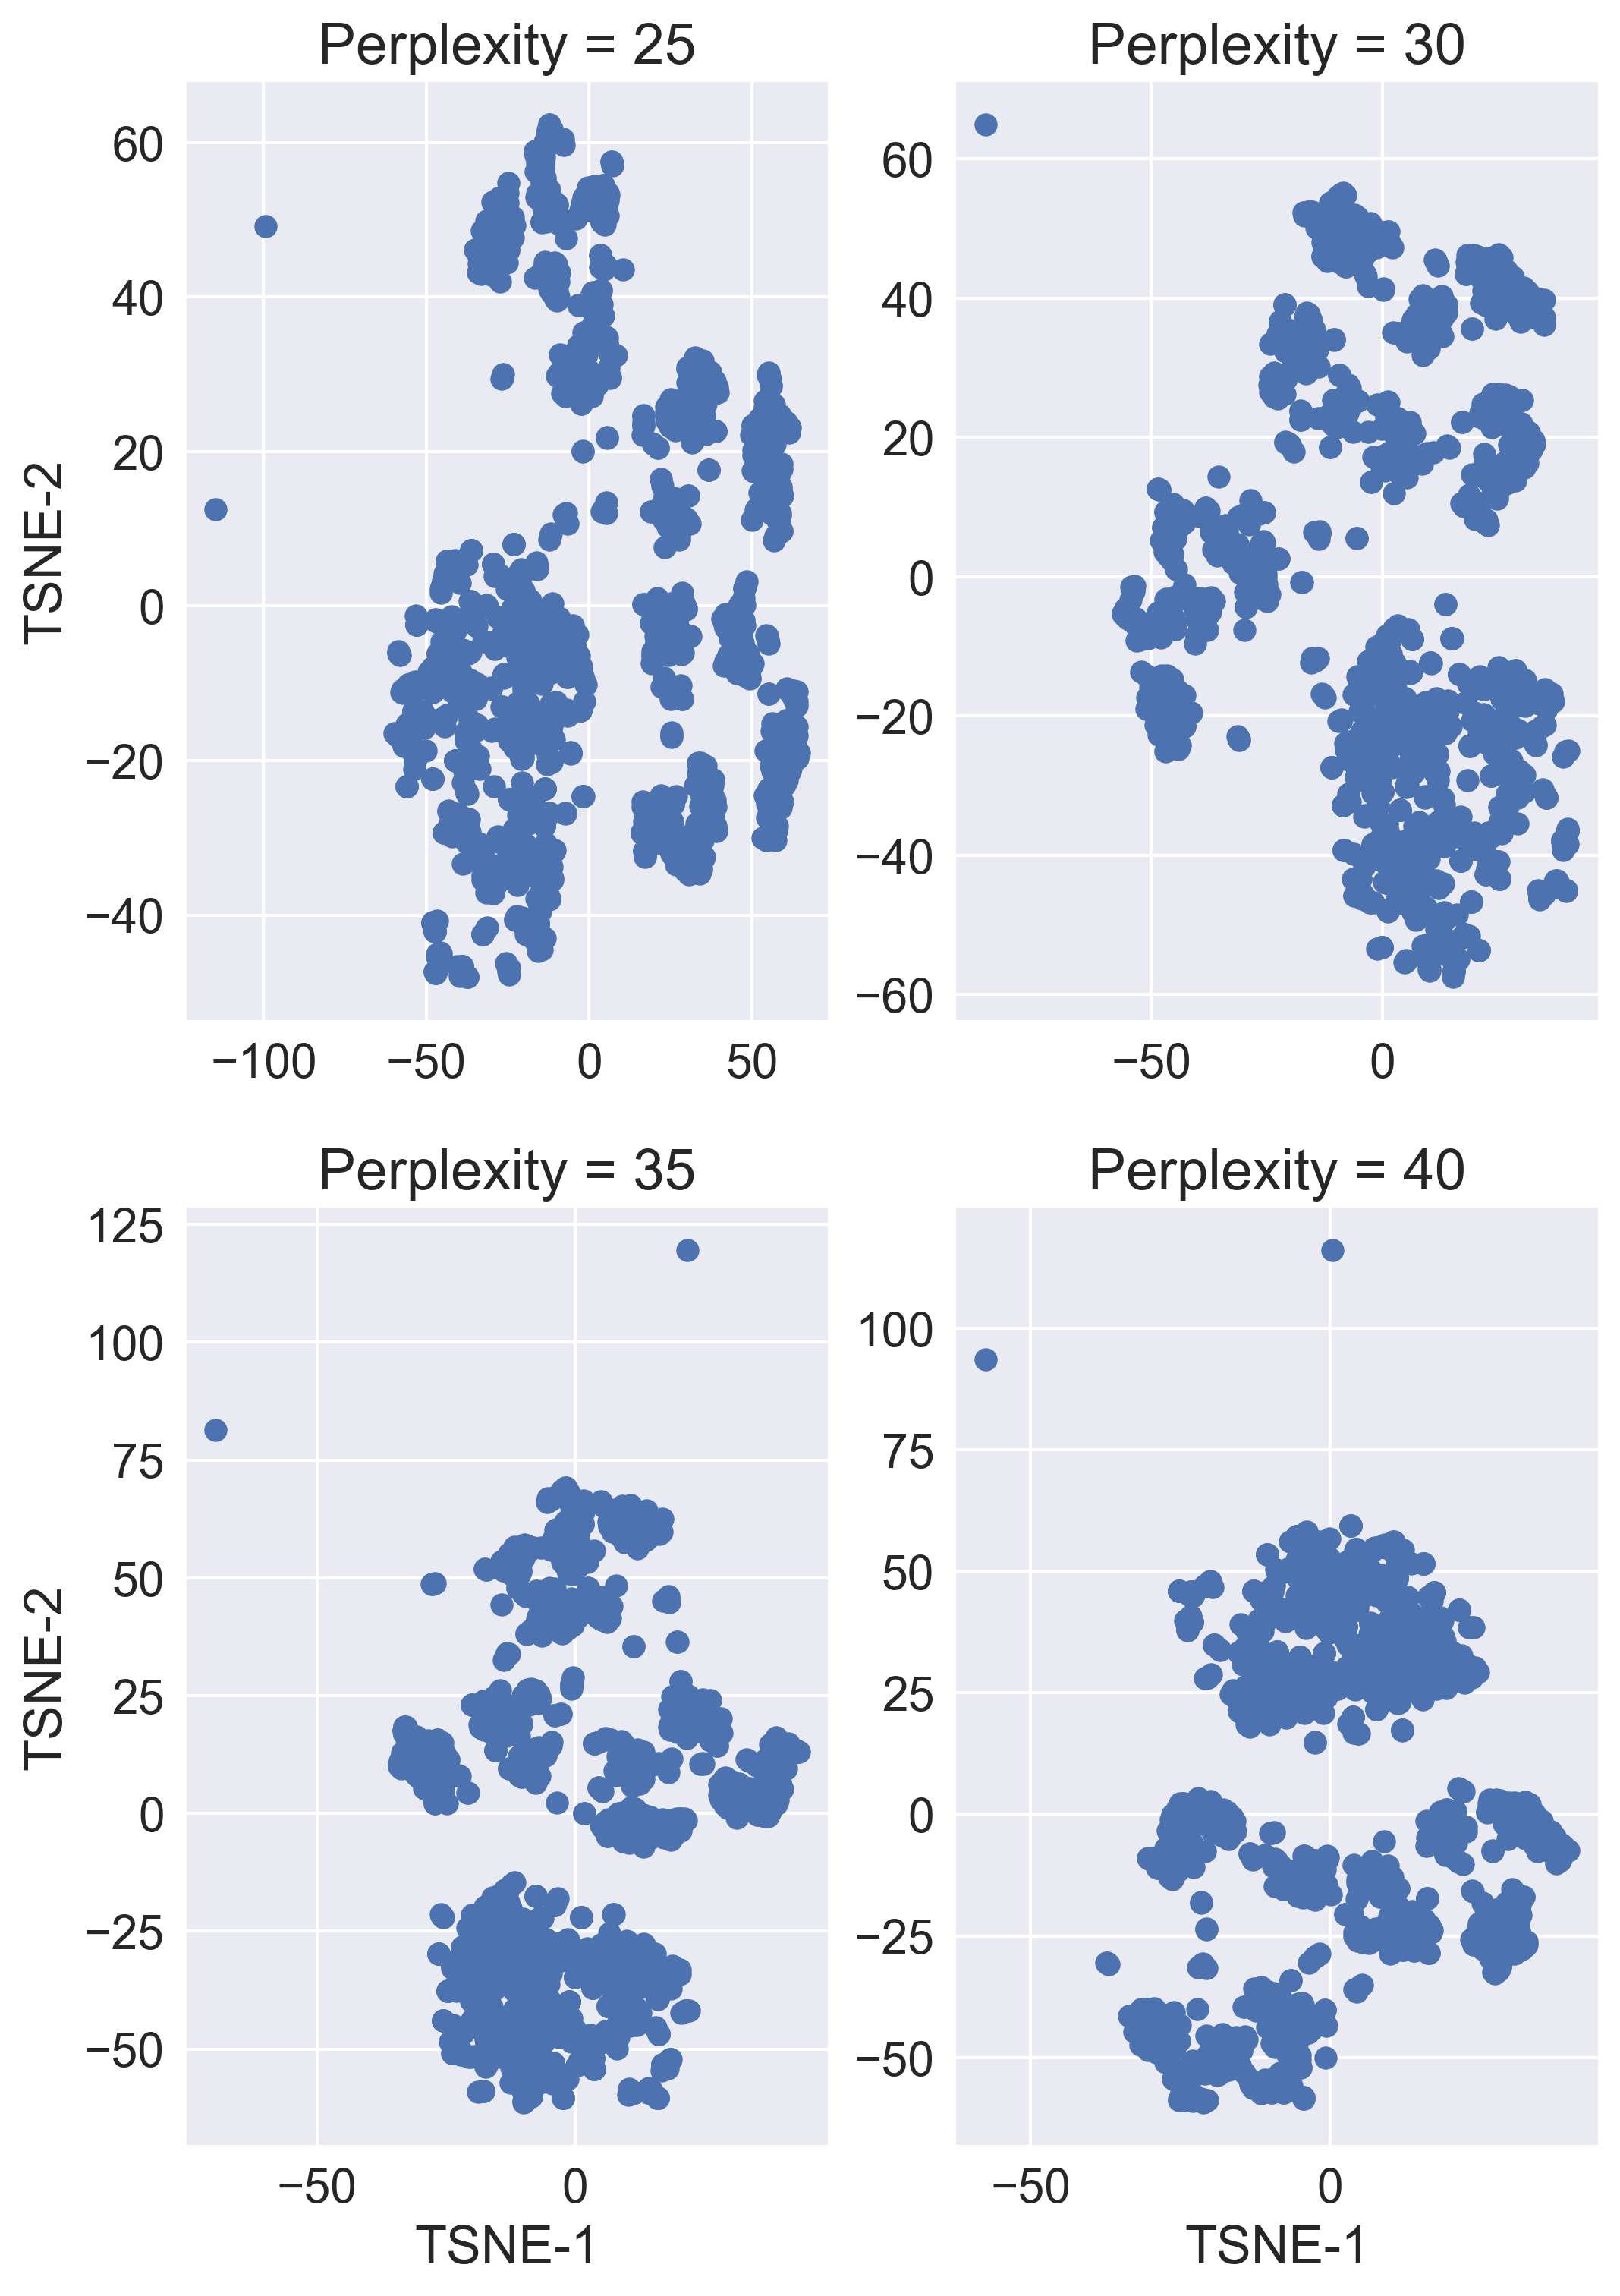

In [18]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

fig, ax = plt.subplots(2,2,figsize=(8,12),dpi=300)
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

### Repeat above with just experimental data

In [19]:
# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
experiment_df

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
313861539,0.065233,0.219386,-2.039271,-0.679514,-0.114439,-0.070908,-0.290141,2.347818,-0.889462,-0.108382,...,-0.347344,1.132402,0.294605,-0.683698,1.257711,-1.242429,1.654359,0.791731,-0.623025,-1.213859
313861677,0.968348,0.916649,-0.036468,0.016782,-0.497444,-0.154438,1.105349,-0.400364,1.214151,0.924870,...,-0.145324,0.454335,-0.624019,-0.203222,0.798353,2.001353,0.659566,-0.464265,0.987169,0.841347
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579
313862167,-1.224165,-0.526575,0.350739,-0.341501,-0.549890,-0.041079,-1.226939,0.040567,-0.648000,-1.573756,...,-0.253411,1.100969,0.252020,-0.259450,-0.702438,-0.762877,1.612545,0.738938,-1.952739,-0.513579


In [20]:
model_df[:] = ss.fit_transform(model_no_trans_df.values);

In [21]:
model_no_trans_df.head()

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
Cell_ID,,,,,,,,,,,,,,,,,,,,,
NMLCL000073,0.259622,0.386735,-0.220518,-0.690189,-0.795471,-0.104645,0.190438,-0.628728,-0.269888,0.244358,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL000087,1.529171,1.077410,-2.388803,-2.384102,-1.653556,-0.066634,1.492752,-0.896908,-0.177259,0.809748,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL000089,1.616926,1.136490,-2.390780,-2.381344,-1.653679,-0.065716,1.560397,-0.897175,-0.169738,0.886552,...,3.592684,-1.469116,-3.229852,3.834427,-2.473257,-2.173638,-1.569722,-3.278897,0.832377,-1.842961
NMLCL000090,1.653041,1.026007,-2.398875,-2.410329,-1.659948,-0.072275,1.518933,-0.898020,-0.224893,0.907937,...,-1.789786,-0.252386,0.066924,-1.998244,1.429103,-0.053912,-0.070354,0.507217,0.549952,-0.254345
NMLCL000091,1.435596,1.109388,-2.386871,-2.377715,-1.651992,-0.066001,1.500107,-0.897216,-0.172245,0.716797,...,-1.790786,-0.255874,0.057472,-1.970425,1.432651,-0.134635,-0.075367,0.494560,0.617983,-0.263956


In [22]:
model_df.head()

,AHP1_depth_from_peak_1.5x,AHP2_depth_from_peak_1.5x,AHP_depth_1.5x,AHP_depth_abs_1.5x,AHP_depth_abs_slow_1.5x,AHP_depth_diff_1.5x,AHP_depth_from_peak_1.5x,AHP_slow_time_1.5x,AHP_time_from_peak_1.5x,AP1_amp_1.5x,...,threshold_v_3.0x,trough_index_3.0x,trough_t_3.0x,trough_v_3.0x,upstroke_3.0x,upstroke_downstroke_ratio_3.0x,upstroke_index_3.0x,upstroke_t_3.0x,upstroke_v_3.0x,width_3.0x
Cell_ID,,,,,,,,,,,,,,,,,,,,,
NMLCL000073,-0.306779,-0.301677,1.673201,1.136366,0.718882,-0.064052,-0.399107,-0.438194,-0.338322,-0.013738,...,1.356511,-1.358581,-1.358581,1.348875,-1.160019,-1.226815,-1.356336,-1.356336,0.637803,-0.784966
NMLCL000087,1.354491,1.052146,-1.013127,-1.379278,-1.193400,0.008995,1.272474,-0.945424,-0.288988,0.734261,...,1.356511,-1.358581,-1.358581,1.348875,-1.160019,-1.226815,-1.356336,-1.356336,0.637803,-0.784966
NMLCL000089,1.469323,1.167952,-1.015575,-1.375182,-1.193674,0.010759,1.359300,-0.945930,-0.284982,0.835870,...,1.356511,-1.358581,-1.358581,1.348875,-1.160019,-1.226815,-1.356336,-1.356336,0.637803,-0.784966
NMLCL000090,1.516581,0.951389,-1.025605,-1.418228,-1.207644,-0.001846,1.306078,-0.947529,-0.314358,0.864162,...,-0.837917,0.645818,0.645818,-1.045157,1.380073,0.455402,0.659946,0.659946,0.314971,0.135179
NMLCL000091,1.232043,1.114829,-1.010733,-1.369793,-1.189914,0.010211,1.281915,-0.946007,-0.286317,0.611288,...,-0.838325,0.640071,0.640071,-1.033738,1.382382,0.391339,0.653206,0.653206,0.392735,0.129612


In [ ]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

df = model_df.copy()

fig, ax = plt.subplots(2,2,figsize=(8,12))
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

CPU times: user 5.41 s, sys: 0 ns, total: 5.41 s
Wall time: 5.41 s
CPU times: user 5.67 s, sys: 168 ms, total: 5.84 s
Wall time: 5.6 s


In [ ]:
filename = os.path.join(path2data,'new_cortical_ephys.csv')
model_df.to_csv(filename)

filename = os.path.join(path2data,'new_cortical_ephys_no_trans.csv')
model_no_trans_df.to_csv(filename)

filename = os.path.join(path2data,'experiment_ephys_no_trans.csv')
experiment_no_trans_df.to_csv(filename)